In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import random

In [7]:
mnist=tf.keras.datasets.mnist #dataset minst present in keras,we load it and divide into train & test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
len(x_train)

60000

In [9]:
len(x_test)

10000

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [25]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

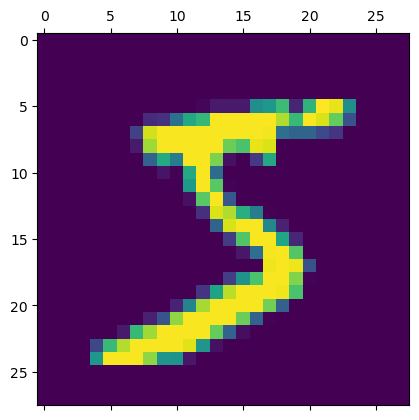

In [12]:
plt.matshow(x_train[0]) #we can change it by changing the argument

In [13]:
x_train = x_train/255 #normalize images to range 0,1 thus increase efficiency
x_test = x_test/255

In [14]:
x_train[11]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
model = keras.Sequential([  #seq model will put one layer after the other,here 3 layers-i/p,hidden,o/p
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='sgd', #stochastic gradient descent optimizer
              loss='sparse_categorical_crossentropy', #saves time in memory & computation, use single int for class than whole vector,lowers the score indicating model is performing better
              metrics=['accuracy'])

In [17]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10) #train model,epochs=no of time model will cycle the data,more epoch more model improve upto certain time

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.6614 - accuracy: 0.8288 - val_loss: 0.3571 - val_accuracy: 0.9033
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3386 - accuracy: 0.9050 - val_loss: 0.2938 - val_accuracy: 0.9173
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2904 - accuracy: 0.9171 - val_loss: 0.2644 - val_accuracy: 0.9254
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2613 - accuracy: 0.9259 - val_loss: 0.2411 - val_accuracy: 0.9308
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2391 - accuracy: 0.9325 - val_loss: 0.2250 - val_accuracy: 0.9352
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2213 - accuracy: 0.9380 - val_loss: 0.2086 - val_accuracy: 0.9405
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2060 - accuracy: 0.9416 - val_loss: 0.1959 - val_accuracy

In [18]:
test_loss, test_acc=model.evaluate(x_test,y_test) #evaluate model

313/313 [==============================] - 1s 3ms/step - loss: 0.1659 - accuracy: 0.9520


In [19]:
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

Loss=0.166
Accuracy=0.952


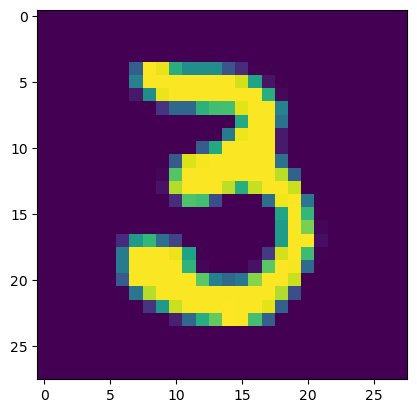

In [20]:
n=random.randint(0,9999) #make prediction
plt.imshow(x_test[n])
plt.show()

In [21]:
predicted_value=model.predict(x_test) #do prediction on testing set
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n])) #return max value

313/313 [==============================] - 1s 3ms/step
Handwritten number in the image is= 3


In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

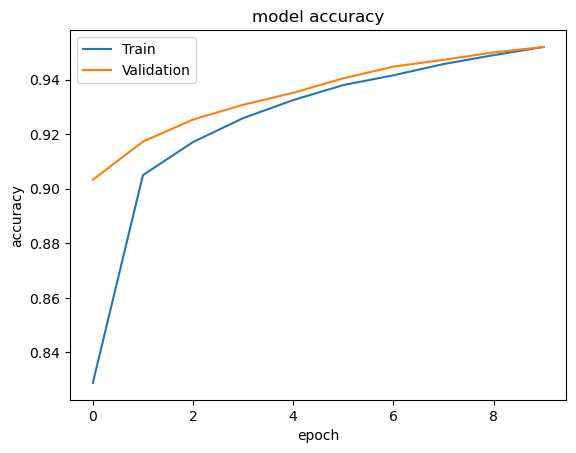

In [23]:
plt.plot(history.history['accuracy']) #plot train and loss accuracy
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

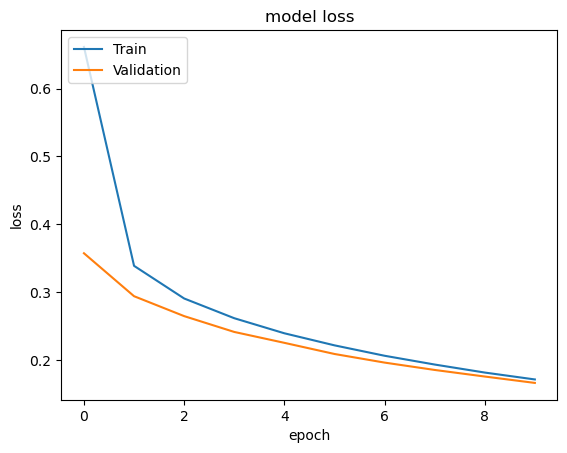

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

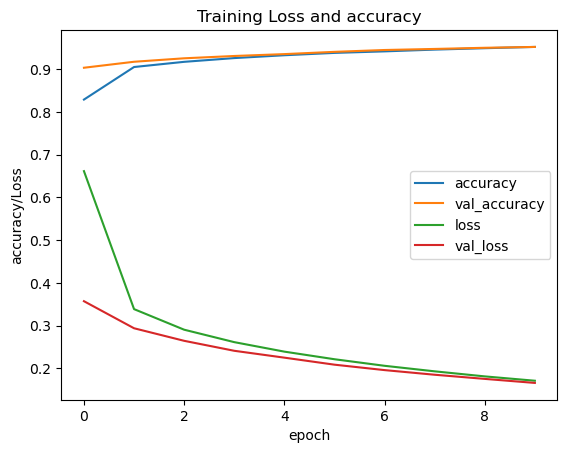

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

In [26]:
keras_model_path="/content/sample_data" #save model
model.save(keras_model_path)

INFO:tensorflow:Assets written to: /content/sample_data\assets


In [27]:
restored_keras_model = tf.keras.models.load_model(keras_model_path) #load and run same model after few days